<a href="https://colab.research.google.com/github/Varshiniamirishetty/DL/blob/main/Multilayer-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4608 - loss: 0.7282 - val_accuracy: 0.5312 - val_loss: 0.6911
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5221 - loss: 0.6853 - val_accuracy: 0.5312 - val_loss: 0.6696
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5994 - loss: 0.6682 - val_accuracy: 0.5625 - val_loss: 0.6515
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6726 - loss: 0.6086 - val_accuracy: 0.5625 - val_loss: 0.6344
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6674 - loss: 0.5918 - val_accuracy: 0.5625 - val_loss: 0.6185
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5715 - loss: 0.6212 - val_accuracy: 0.5625 - val_loss: 0.6041
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7493 - loss: 0.5424 - val_accuracy: 0.5312 - val_loss: 0.5913
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7160 - loss: 0.5375 - val_accuracy: 0.5625 - val_loss: 0.5795
Ep

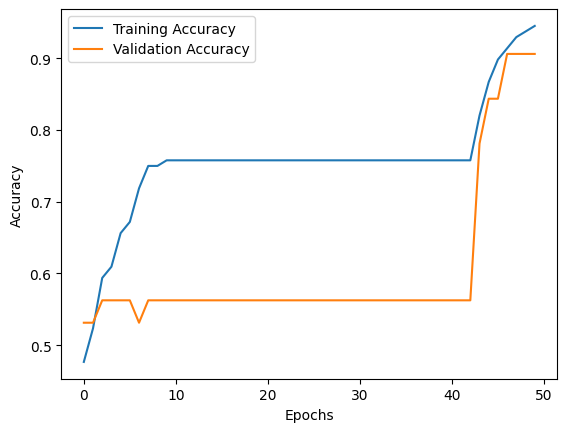

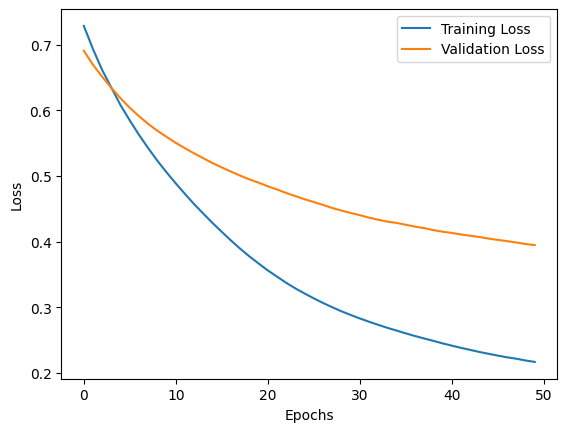

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: PASS


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(42)

attendance = np.random.randint(40, 100, 200)
hours_studied = np.random.uniform(1, 10, 200)

result = ((attendance >= 75) & (hours_studied >= 4)).astype(int)

data = pd.DataFrame({
    "attendance": attendance,
    "hours_studied": hours_studied,
    "result": result
})

X = data[["attendance", "hours_studied"]]
y = data["result"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(8, activation="relu", input_shape=(2,)))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

y_pred = (model.predict(X_test) > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

new_student = np.array([[82, 6]])
new_student = scaler.transform(new_student)

prediction = model.predict(new_student)

if prediction > 0.5:
    print("Prediction: PASS")
else:
    print("Prediction: FAIL")
